In [1]:
N = 50 # total number of data points each group
x_offset = 0.5 # group seperation on x axis
y_offset = 0.5 # group seperation on y axis

In [2]:
g1_x = runif(N, min = 0, max = 1)
g1_y = runif(N, min = 0, max = 1)

g2_x = runif(N, min = 0+x_offset, max = 1+x_offset)
g2_y = runif(N, min = 0+y_offset, max = 1+y_offset)

g_x = c(g1_x, g2_x)
g_y = c(g1_y, g2_y)
group = c(rep(-1,N), rep(1,N))

print(g_x)
print(g_y)
print(group)

  [1] 0.05643985 0.84510241 0.49024601 0.07991616 0.06301503 0.53630147
  [7] 0.97861589 0.98808291 0.65900013 0.18692979 0.32743511 0.90887517
 [13] 0.57190650 0.16513057 0.56833779 0.50469786 0.70060340 0.20133810
 [19] 0.74340160 0.66149494 0.22597171 0.16705537 0.66840021 0.05514926
 [25] 0.13423130 0.46439760 0.75033234 0.99733735 0.26093868 0.09659777
 [31] 0.79772643 0.91779859 0.54568309 0.53465300 0.59380852 0.82804980
 [37] 0.53702442 0.89386951 0.79638039 0.69946920 0.25337432 0.36585176
 [43] 0.58579997 0.66435589 0.83276245 0.40276375 0.99792718 0.44886785
 [49] 0.68221782 0.54459601 0.93663520 1.34560928 0.50952807 0.89054644
 [55] 0.87478709 1.47425677 1.10166537 0.74271356 0.61628232 1.34479744
 [61] 1.05374254 0.77882091 1.39468270 0.97983870 1.39183996 0.67573058
 [67] 1.14013769 1.31000707 1.01272777 0.51747296 0.95267664 1.45775020
 [73] 1.35513937 0.74658626 1.37922014 1.37093014 1.07626643 0.82834108
 [79] 1.35846458 0.64644656 1.22463754 0.64285526 1.37569130 1.0

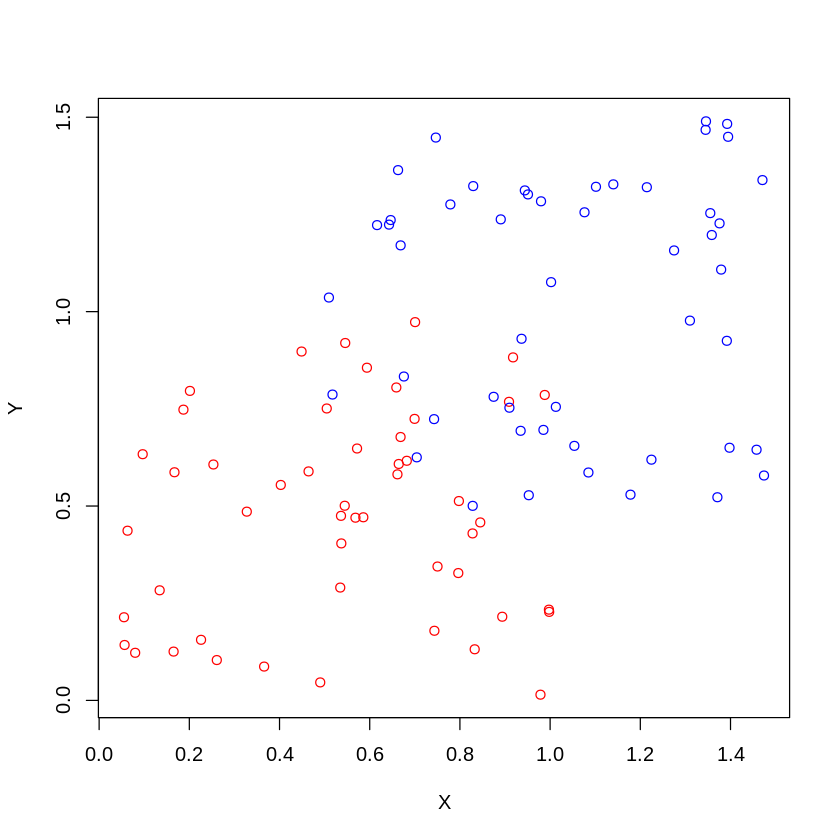

In [3]:
plot(g_x, g_y, type='n', xlab='X', ylab='Y')
points(g1_x, g1_y, col='red')
points(g2_x, g2_y, col='blue')

In [4]:
w0 = 0.1 # initial weitht
w1 = 0.2 # initial weight
w2 = 0.3 # initial weitht

M = 15            # number of epochs to run
eta = 0.005       # learning rate
th = 0.9          # threshold to stop
verbose = F   # whether detailed weight update info is printed

# 3 Perceptron Model
The perceptron model is defined in the below embed for loops with the outer loop for epoch and the inner loop for weight update of each data point. The accuracy is calculated after each epoch to decide whether next epoch is needed or not. For each epoch, the order of data points to update the weight is randomly shuffled.

In [6]:
for (i in 1:M){
    print(paste('Epoch starts: ', i))
    
    ## We reshuffle the order of the datapoint for each epoch.
    index = 1:(2*N)
    index = sample(index)
    
    for (j in index){
        y_j = w0 + w1*g_x[j] + w2*g_y[j]
        if (y_j >= 0){
            pred_j = 1
        }else{
            pred_j = -1}
        
        w0 = w0 + eta*(group[j] - pred_j)*1.0
        w1 = w1 + eta*(group[j] - pred_j)*g_x[j]
        w2 = w2 + eta*(group[j] - pred_j)*g_y[j]
        if (verbose == T){
            print(paste('  -> updating data point ', j, ' : '))
            print(paste('     -> w0: ' ,w0))
            print(paste('     -> w0: ' ,w1))
            print(paste('     -> w0: ' ,w2))
        }
    }  
    y_all = w0 + w1*g_x + w2*g_y
    y_pred = y_all
    y_pred[y_all >= 0] = 1
    y_pred[y_all< 0] = -1
    
    acc = sum(y_pred == group)/length(group)
    print(paste('Epoch ends: ', i, ' WITH accuracy: ', acc))
    if (acc >= th){
      break
    }
}

[1] "Epoch starts:  1"
[1] "Epoch ends:  1  WITH accuracy:  0.81"
[1] "Epoch starts:  2"
[1] "Epoch ends:  2  WITH accuracy:  0.8"
[1] "Epoch starts:  3"
[1] "Epoch ends:  3  WITH accuracy:  0.86"
[1] "Epoch starts:  4"
[1] "Epoch ends:  4  WITH accuracy:  0.77"
[1] "Epoch starts:  5"
[1] "Epoch ends:  5  WITH accuracy:  0.83"
[1] "Epoch starts:  6"
[1] "Epoch ends:  6  WITH accuracy:  0.87"
[1] "Epoch starts:  7"
[1] "Epoch ends:  7  WITH accuracy:  0.9"


# 4 Checking Prediction

In [7]:
y_all = w0 + w1*g_x + w2*g_y
print(y_all)

y_pred = y_all
y_pred[y_all >= 0] = 1
y_pred[y_all< 0] = -1

print(y_pred)

acc = sum(y_pred == group)/length(group)
print(acc)

  [1] -0.1205305077 -0.0167039497 -0.0904818705 -0.1203973778 -0.0904313100
  [6] -0.0432745956 -0.0489414588  0.0292829850  0.0010904997 -0.0478452014
 [11] -0.0613111541  0.0202615451 -0.0226350841 -0.1122870220 -0.0408213010
 [16] -0.0184555020  0.0217650262 -0.0416880583 -0.0539787191 -0.0211024899
 [21] -0.1036764466 -0.0658235960 -0.0108329829 -0.1134927344 -0.0992955110
 [26] -0.0383873920 -0.0367607906 -0.0252840141 -0.1057016493 -0.0676131134
 [31] -0.0155193987  0.0325422281  0.0021961586 -0.0619365791  0.0002247329
 [36] -0.0211076439 -0.0503235976 -0.0365813359 -0.0342318016 -0.0033107868
 [41] -0.0559188449 -0.0977805095 -0.0391144760 -0.0181645006 -0.0505786711
 [46] -0.0475232060 -0.0258071396 -0.0088662976 -0.0157033294 -0.0399087761
 [51]  0.0390757053  0.1326333673  0.0106191137  0.0656739775  0.0184339783
 [56]  0.0529943618  0.0934084868  0.0005828927  0.0390877007  0.1303602482
 [61]  0.0221535269  0.0592992235  0.1331355959  0.0785104043  0.0802184991
 [66]  0.005

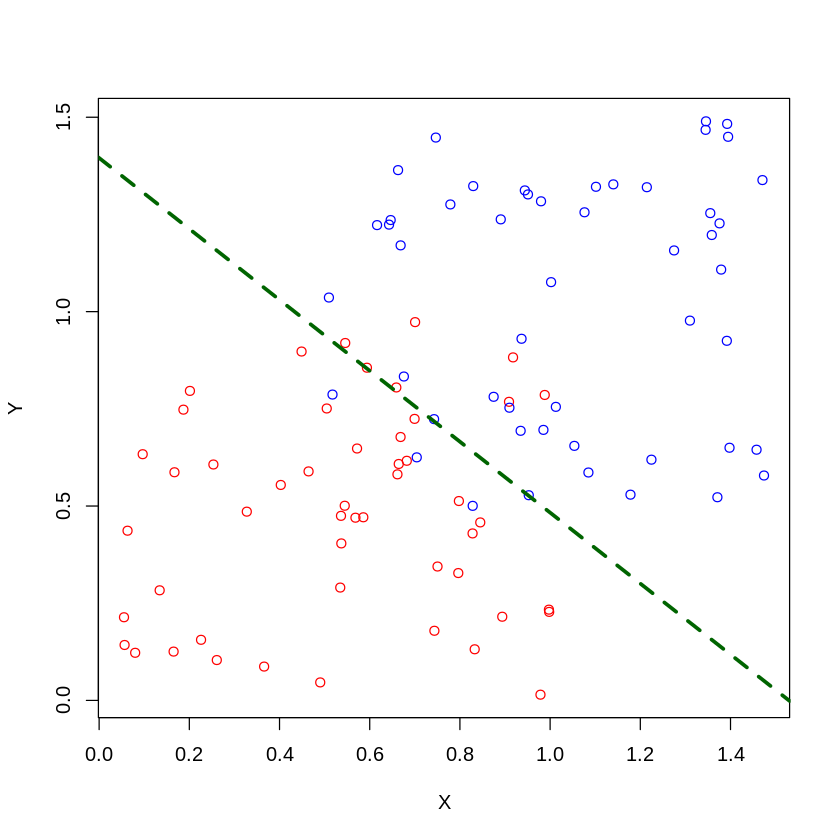

In [8]:
plot(g_x, g_y, type='n', xlab='X', ylab='Y')
points(g1_x, g1_y, col='red')
points(g2_x, g2_y, col='blue')
abline(a = -1.0*w0/w2, b = -1.0*w1/w2, col='dark green', lwd=3, lty=2)